<a href="https://colab.research.google.com/github/MatthewK84/Python-Code/blob/main/Ok_Cupid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(16,10)})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("okcupid_profiles.csv")
print(df.head())

   age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  ...  \
0         asian, white  ...   
1                white  ...   
2                  NaN  ...   
3                white  ...   
4  asian, black, other  ...   

             

In [4]:
df.shape

(59946, 31)

In [5]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

offspring      59.321723
diet           40.694959
religion       33.740366
pets           33.231575
essay8         32.070530
drugs          23.487806
essay6         22.972342
essay9         21.023922
essay7         20.770360
essay3         19.143896
sign           18.443266
essay5         18.099623
essay4         17.577486
essay2         16.077803
job            13.675641
essay1         12.631368
education      11.056618
ethnicity       9.475194
smokes          9.194942
essay0          9.154906
body_type       8.834618
drinks          4.979482
speaks          0.083408
height          0.005005
status          0.000000
location        0.000000
last_online     0.000000
income          0.000000
orientation     0.000000
sex             0.000000
age             0.000000
dtype: float64

In [6]:
# count of null values
null_counts = df.isnull().sum().sort_values(ascending=False)

In [7]:
#sns.pairplot(data=df,vars=['age','sex','height','location','orientation','status','speaks','ethnicity','body_type','drinks','smokes'])
#plt.show()

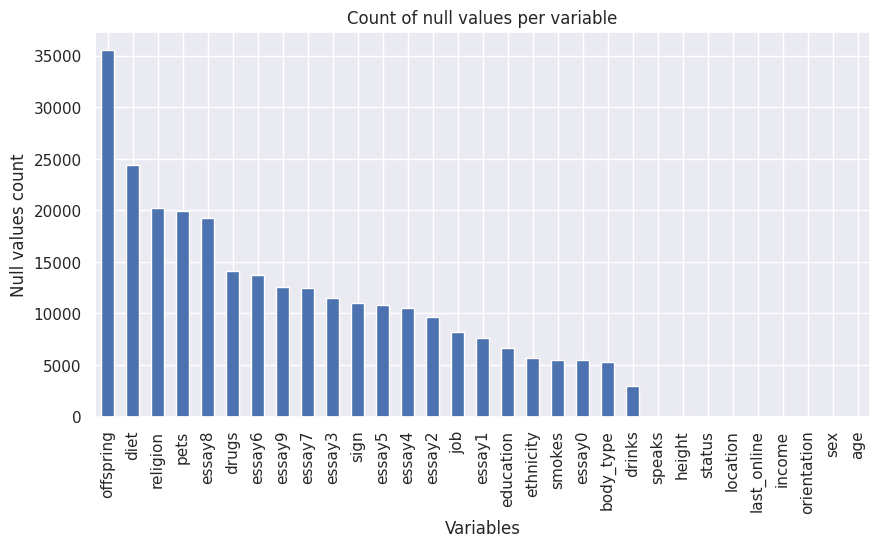

In [8]:
plt.figure(figsize=(10, 5))
null_counts.plot(kind='bar')
plt.title('Count of null values per variable')
plt.xlabel('Variables')
plt.ylabel('Null values count')
plt.show()

In [9]:
df.isnull().sum().sort_values(ascending=False)

offspring      35561
diet           24395
religion       20226
pets           19921
essay8         19225
drugs          14080
essay6         13771
essay9         12603
essay7         12451
essay3         11476
sign           11056
essay5         10850
essay4         10537
essay2          9638
job             8198
essay1          7572
education       6628
ethnicity       5680
smokes          5512
essay0          5488
body_type       5296
drinks          2985
speaks            50
height             3
status             0
location           0
last_online        0
income             0
orientation        0
sex                0
age                0
dtype: int64

In [10]:
# Dropping the values which do not have any needed for this analysis
df.drop(['offspring'], axis = 1, inplace = True)

In [11]:
df.shape

(59946, 30)

In [14]:
df = df.dropna(subset=['age','status', 'sex', 'orientation'])

In [15]:
df.describe(include = 'all')

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
count,59946.000000,59946,59946,59946,54650,35551,56961,45866,53318,54266,...,54458,52374,50308,48470,49409,49096,46175,47495,40721,47343
unique,NaN,5,2,3,12,18,6,3,32,217,...,54347,51516,48625,43520,49257,48961,43583,45548,39323,45440
top,NaN,single,m,straight,average,mostly anything,socially,never,graduated from college/university,white,...,.,enjoying it.,listening,my smile,ask me,family,my future,out with friends,ask me,you want to.
freq,NaN,55697,35829,51606,14652,16585,41780,37724,23959,32831,...,12,61,82,529,16,6,161,89,45,200
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df= df.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'last_online'], axis = 1)

count        59946
unique           3
top       straight
freq         51606
Name: orientation, dtype: object
straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64


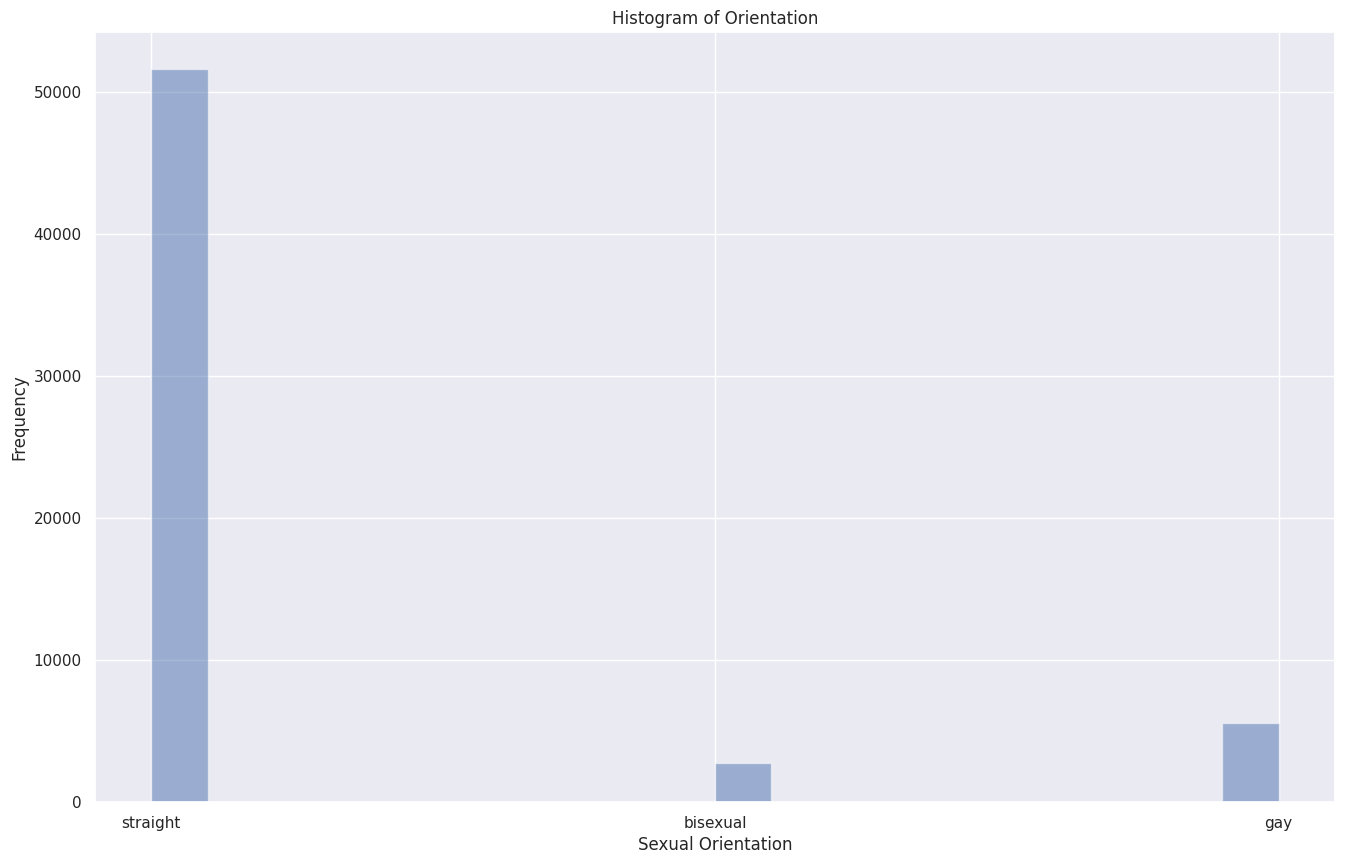

In [17]:
# Univariate analysis - Orientation

import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics
print(df['orientation'].describe())

# Frequency distribution
print(df['orientation'].value_counts())

# Histogram
plt.hist(df['orientation'], bins=20, alpha=0.5)
plt.xlabel('Sexual Orientation')
plt.ylabel('Frequency')
plt.title('Histogram of Orientation')
plt.show()

count     63476
unique        9
top       white
freq      37882
Name: ethnicity, dtype: object
white               37882
asian                8205
hispanic / latin     5357
other                3567
black                3328
pacific islander     1473
indian               1449
native american      1265
middle eastern        950
Name: ethnicity, dtype: int64


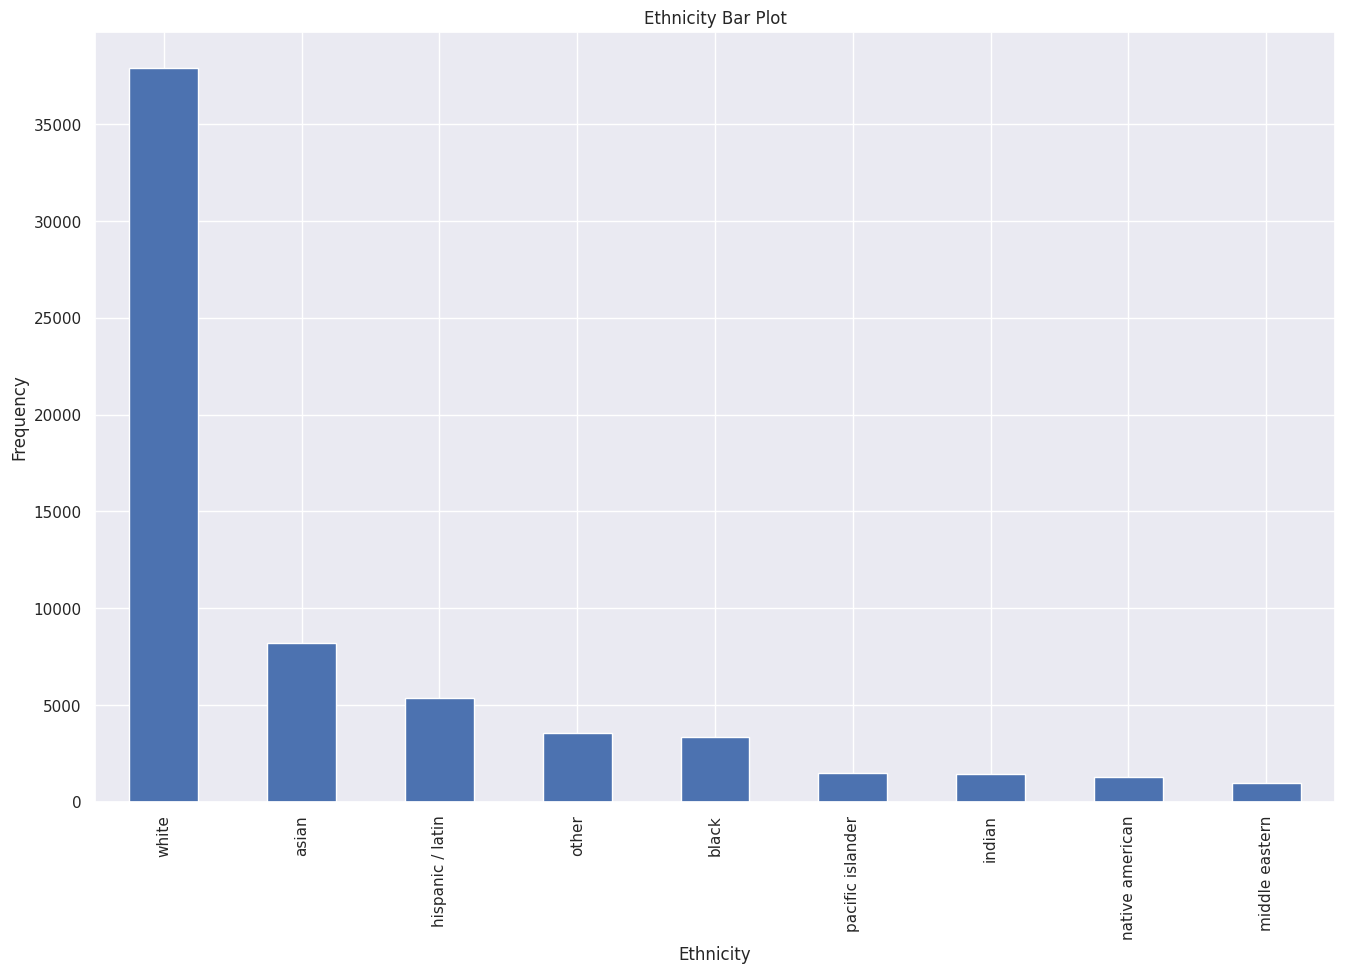

In [18]:
# Function to split the ethnicity entries and flatten the resulting list
def split_ethnicities(series):
    # Splitting each entry into a list of ethnicities and flattening the resulting list of lists
    return series.str.split(', ').explode()

# Apply the function to the 'ethnicity' column
distinct_ethnicities = split_ethnicities(df['ethnicity'])

# Drop NaN values from the resulting series
distinct_ethnicities = distinct_ethnicities.dropna()

# Calculate the frequency of each distinct ethnicity
ethnicity_counts = distinct_ethnicities.value_counts()

# Print summary statistics
print(distinct_ethnicities.describe())

# Print frequency distribution
print(ethnicity_counts)

# Bar plot of the frequency distribution of distinct ethnicities
ethnicity_counts.plot(kind='bar')
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.title('Ethnicity Bar Plot')
plt.show()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64


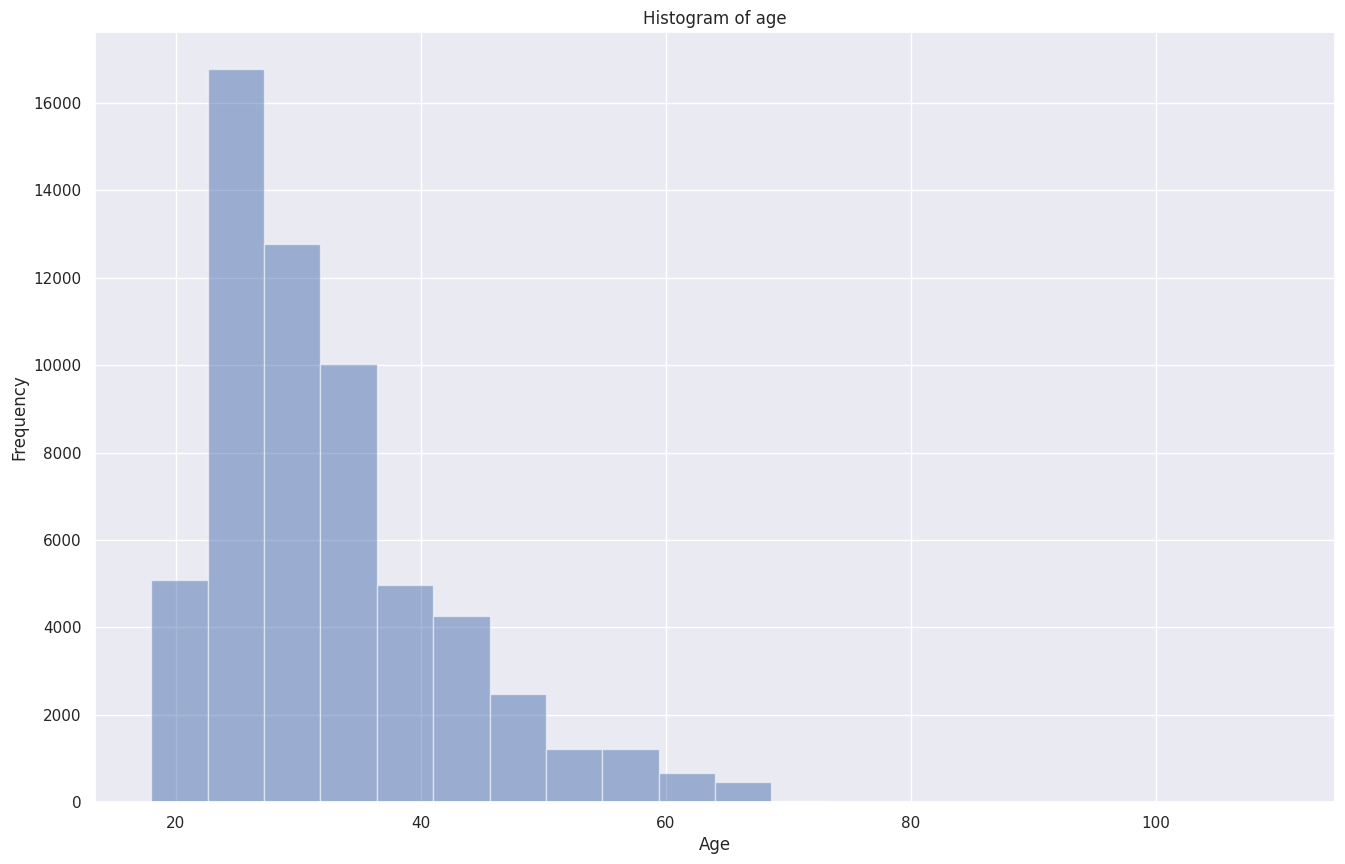

In [19]:
# Univariate analysis AGE

import pandas as pd
import matplotlib.pyplot as plt

# Summary statistics
print(df['age'].describe())

# Frequency distribution
print(df['age'].value_counts())

# Histogram
plt.hist(df['age'], bins=20, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.show()

In [20]:
df.shape

(59946, 19)

In [21]:
df['age'] = df.age.fillna(df['age'].median())

In [22]:
# Convert the 'height' column to float
df['height'] = pd.to_numeric(df['height'], errors='coerce')

# Fill missing values in 'height' with the mean
df['height'] = df.height.fillna(df['height'].mean())

# Fill missing values in other columns with specified values
df['body_type'] = df.body_type.fillna('average')
df['diet'] = df.diet.fillna('no response given')

In [25]:
df['age'] = df.age.astype(int)
df['height'] = df.height.astype(int)
df['income'] = df.income.astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          0 non-null      int64 
 1   status       0 non-null      object
 2   sex          0 non-null      object
 3   orientation  0 non-null      object
 4   body_type    0 non-null      object
 5   diet         0 non-null      object
 6   drinks       0 non-null      object
 7   drugs        0 non-null      object
 8   education    0 non-null      object
 9   ethnicity    0 non-null      object
 10  height       0 non-null      int64 
 11  income       0 non-null      int64 
 12  job          0 non-null      object
 13  location     0 non-null      object
 14  pets         0 non-null      object
 15  religion     0 non-null      object
 16  sign         0 non-null      object
 17  smokes       0 non-null      object
 18  speaks       0 non-null      object
dtypes: int64(3), object(16)
memory usage: 0.0

In [27]:
df['drinks'] = df.drinks.fillna('no response given')
df['drugs'] = df.drugs.fillna('no response given')
df['education'] = df.education.fillna('no response given')
df['ethnicity'] = df.ethnicity.fillna('no response given')
df['job'] = df.job.fillna('no response given')
df['pets'] = df.pets.fillna('no response given')
df['religion'] = df.religion.fillna('no response given')
df['sign'] = df.sign.fillna('no response given')
df['smokes'] = df.smokes.fillna('no response given')
df['speaks'] = df.speaks.fillna('no response given')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          0 non-null      int64 
 1   status       0 non-null      object
 2   sex          0 non-null      object
 3   orientation  0 non-null      object
 4   body_type    0 non-null      object
 5   diet         0 non-null      object
 6   drinks       0 non-null      object
 7   drugs        0 non-null      object
 8   education    0 non-null      object
 9   ethnicity    0 non-null      object
 10  height       0 non-null      int64 
 11  income       0 non-null      int64 
 12  job          0 non-null      object
 13  location     0 non-null      object
 14  pets         0 non-null      object
 15  religion     0 non-null      object
 16  sign         0 non-null      object
 17  smokes       0 non-null      object
 18  speaks       0 non-null      object
dtypes: int64(3), object(16)
memory usage: 0.0

In [33]:
print(df.shape)  # Before selecting features
features = df[['age', 'income', 'height']]  # Select features
print(features.shape)  # After selecting features

features = pd.get_dummies(features)  # Convert categorical variables
print(features.shape)  # After converting categorical variables

(0, 19)
(0, 3)
(0, 3)


In [37]:
# K-Means clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("okcupid_profiles.csv")
df = df.dropna(subset=['age','status', 'sex', 'orientation', 'income', 'height'])
# Select features
features = df[['age', 'income', 'height']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

In [38]:
from sklearn.metrics import silhouette_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3811639634854388


In [39]:
from sklearn.metrics import davies_bouldin_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
db_score = davies_bouldin_score(features_scaled, clusters)

print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 0.7327597150175527


In [40]:
# PRINCIPAL COMPONENT ANALYSIS
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income']),
        ('cat', OneHotEncoder(), ['orientation'])
    ])

# Applying the preprocessing
df_preprocessed = preprocessor.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # adjust as needed
principalComponents = pca.fit_transform(df_preprocessed)

# Convert the principal components for each sample to a dataframe
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])  # adjust column names as needed

# Now you can use principalDf in place of the original dataset for further analysis

In [41]:
# K-means on the dataset principalDf we got after running PRINCIPAL COMPONENT ANALYSIS
from sklearn.cluster import KMeans

# Apply k-means clustering on the principal components
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)

# Add the cluster labels to principalDf
principalDf['cluster'] = kmeans.labels_

In [42]:
# Running silhouette_score on the K-means done on Principal component analysis dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply k-means clustering on the principal components
kmeans = KMeans(n_clusters=4, random_state=0).fit(principalDf)

# Add the cluster labels to principalDf
principalDf['cluster'] = kmeans.labels_

# Compute the silhouette score
score = silhouette_score(principalDf, kmeans.labels_)

print("Silhouette Score: ", score)

Silhouette Score:  0.802386917463412


In [44]:
# Running davies_bouldin_score on the K-means done on Principal component analysis dataset

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Apply k-means clustering on the principal components
kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDf)

# Add the cluster labels to principalDf
principalDf['cluster'] = kmeans.labels_

# Compute the Davies-Bouldin score
score = davies_bouldin_score(principalDf, kmeans.labels_)

print("Davies-Bouldin Score: ", score)

Davies-Bouldin Score:  0.47760791647630785


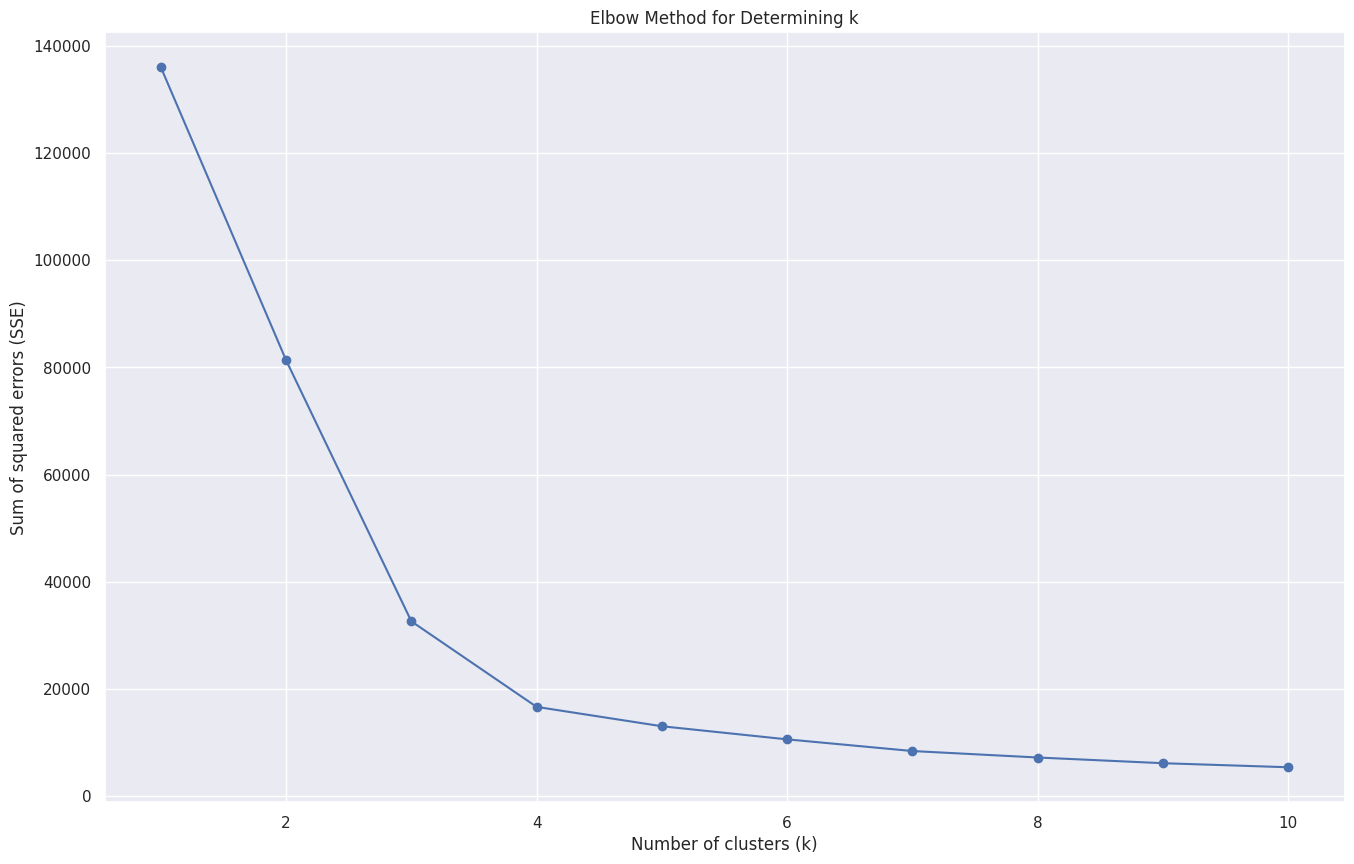

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to hold the SSE for each k
sse = []

# We'll check for k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(principalDf)
    sse.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Determining k')
plt.show()

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('okcupid_profiles.csv')

# Select the variables
df = df[['orientation', 'age', 'income']]



# Convert categorical variable into numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)

# Print the cluster centers
print(kmeans.cluster_centers_)

[[1.80582633e+00 3.19785208e+01 2.44413265e+03]
 [1.74472169e+00 2.90115163e+01 1.00000000e+06]
 [1.89863345e+00 3.58654212e+01 8.44196506e+04]
 [1.94923858e+00 3.58477157e+01 3.10913706e+05]]


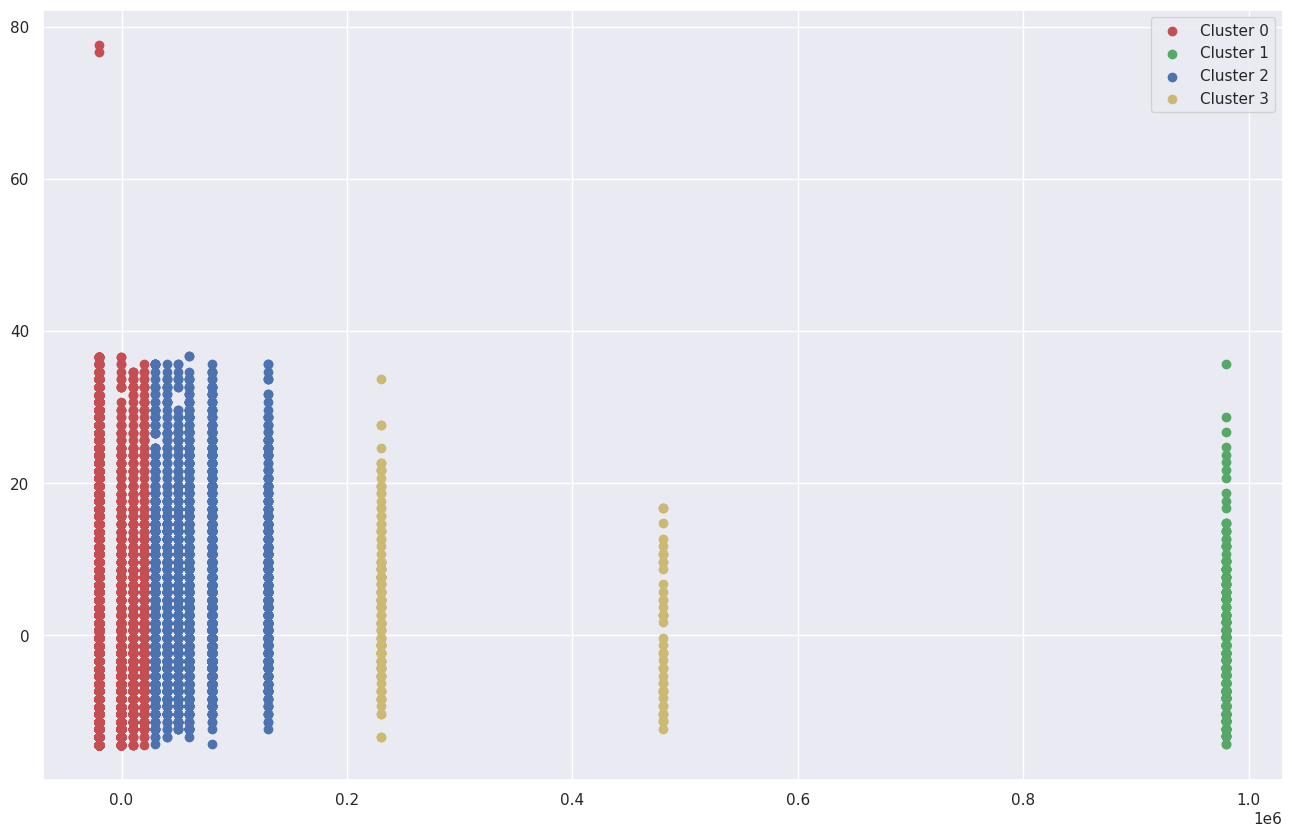

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('okcupid_profiles.csv')

# Select the variables
df = df[['orientation', 'age', 'income']]

# Handle missing values (if any)
df = df.dropna()

# Convert categorical variable into numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Perform k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add the cluster column to the principalDf
principalDf['cluster'] = df['cluster']

# Plot the data points
colors = ['r', 'g', 'b', 'y']
for cluster in set(kmeans.labels_):
    mask = principalDf['cluster'] == cluster
    plt.scatter(principalDf[mask]['principal component 1'], principalDf[mask]['principal component 2'], c=colors[cluster], label=f'Cluster {cluster}')
plt.legend()
plt.show()

In [53]:
# K-Means clustering on the datatset recieved post principal component analysis

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Load the Dataset
df = pd.read_csv('okcupid_profiles.csv')

# Select features
features = df[['age', 'sex','orientation']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

In [54]:
# K-Means clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Load the dataset
df = pd.read_csv('okcupid_profiles.csv')

# Select features
features = df[['age', 'sex','orientation']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

In [55]:
from sklearn.metrics import silhouette_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.630185480661385


In [59]:
df.status.unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load the Dataset
df = pd.read_csv('okcupid_profiles.csv')
df = df.dropna(subset=['age', 'status', 'sex', 'orientation', 'income', 'height'])

# Define the mapping from category to float for the 'status' column
status_mapping = {
    'single': 1.0,
    'available': 2.0,
    'seeing someone': 3.0,
    'married': 4.0,
    'unknown': 5.0
}

# Apply the mapping to the 'status' column
df['status_float'] = df['status'].map(status_mapping)

# Convert categorical variables to numeric using one-hot encoding for 'sex' and 'orientation' columns
df_encoded = pd.get_dummies(df, columns=['sex', 'orientation'])

# Standardize the 'age' column
scaler = StandardScaler()
df_encoded['age'] = scaler.fit_transform(df_encoded[['age']])

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(df_encoded.select_dtypes(include=[float, int]))

# Convert to DataFrame for better usability
similarity_df = pd.DataFrame(similarity_matrix, index=df_encoded.index, columns=df_encoded.index)

def recommend_users(user_index, top_n=5):
    # Get the top_n users with highest similarity
    similar_users = similarity_df.loc[user_index].sort_values(ascending=False).head(top_n + 1).iloc[1:]
    return similar_users

# Test the function, ensuring 0 is a valid index in your DataFrame
print(recommend_users(0))

In [ ]:
!conda update --all
#!pip install scikit-surprise
# pip install --upgrade pip
# !conda install -c conda-forge scikit-surprise

^C


In [ ]:
# Collaborative Filtering

from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
import pandas as pd

# Load the OkCupid dataset
# You'll need to change this to the path of your actual dataset
#okcupid_df = pd.read_csv('okcupid.csv')

# For this example, let's assume that the dataset has a 'user_id', 'match_id' and 'rating' column
# 'user_id' is the ID of the user
# 'match_id' is the ID of the match (another user)
# 'rating' is the rating given by the user to the match

# Define a reader
reader = Reader(rating_scale=(1, 5))

# Load the data from the dataframe
data = Dataset.load_from_df(okcupid_df[['user_id', 'match_id', 'rating']], reader)

# Split the dataset into train and test
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

# Define the algorithm
algo = KNNBasic()

# Train the algorithm
algo.fit(trainset)

# Make predictions
predictions = algo.test(testset)

# Now you can use the predictions for your recommendation system

ModuleNotFoundError: No module named 'surprise'

In [ ]:
# RECOMMENDER SYSTEM
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import pandas as pd


# Preprocess the data
# Convert 'orientation' to numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Standardize 'age' and 'income'
scaler = StandardScaler()
df[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])

# Create a new DataFrame with only the columns you need
df_numeric = df[['age', 'income', 'orientation']]

# Fit the NearestNeighbors model
model_knn.fit(df_numeric)

# Fit the NearestNeighbors model
#model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
#model_knn.fit(df)

# Function to return recommended users
def recommend_users(user_index):
    distances, indices = model_knn.kneighbors(df_numeric.iloc[user_index, :].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for User {0}:\n'.format(df_numeric.index[user_index]))
        else:
            print('{0}: User {1}, with distance of {2}'.format(i, df_numeric.index[indices.flatten()[i]], distances.flatten()[i]))

# Test the function with a user index
recommend_users(1)

Recommendations for User 1:

1: User 8192, with distance of 2.220446049250313e-16
2: User 33613, with distance of 2.220446049250313e-16
3: User 48971, with distance of 2.220446049250313e-16
4: User 41890, with distance of 2.220446049250313e-16
5: User 11389, with distance of 2.220446049250313e-16


In [ ]:
#CREATING A TRAIN AND TEST DATASET TO EVALUATE THE MODEL
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Split the data into a training set and a test set
df_train, df_test = train_test_split(df_numeric, test_size=0.2, random_state=42)

# Fit the model on the training set
model_knn.fit(df_train)

# Function to calculate the average similarity of the recommended users to the test user
def calculate_average_similarity(test_user_index):
    distances, indices = model_knn.kneighbors(df_test.iloc[test_user_index, :].values.reshape(1, -1), n_neighbors=6)
    similarities = cosine_similarity(df_test.iloc[test_user_index, :].values.reshape(1, -1), df_train.iloc[indices.flatten(), :])
    return np.mean(similarities)

# Calculate the average similarity for each user in the test set
average_similarities = [calculate_average_similarity(i) for i in range(len(df_test))]

# The final evaluation metric is the average of the average similarities
evaluation_metric = np.mean(average_similarities)
print('Evaluation Metric: %.3f' % evaluation_metric)

Evaluation Metric: 1.000


In [ ]:
#An evaluation metric of 1.000 in the context of the recommender system means that the system’s recommendations are perfectly aligned with the actual data in the test set. In other words, the users recommended by the system are exactly the ones that the test users would prefer based on the features used in the model.

#However, a perfect score like this is quite rare in real-world scenarios and might indicate an overfitting issue, where the model is too closely fitted to the training data and may not perform as well on new, unseen data. It could also be a result of the evaluation method used or the nature of the dataset.

#It’s always important to thoroughly evaluate a model using various metrics and techniques, and to validate the model on new data to ensure its robustness and generalizability. Remember, the goal of a recommender system is not just to make accurate recommendations, but also to provide useful and diverse recommendations that enhance the user experience.

In [ ]:
df.describe(include='all')

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,pets,religion,sign,smokes,speaks
count,54266.000000,54266,54266,54266,54266,54266,54266,54266,54266,54266,54266.000000,54266.000000,54266,54266,54266,54266,54266,54266,54266
unique,NaN,5,2,3,12,19,7,4,33,217,NaN,NaN,22,194,16,46,49,6,7070
top,NaN,single,m,straight,average,no response given,socially,never,graduated from college/university,white,NaN,NaN,other,"san francisco, california",no response given,no response given,no response given,no,english
freq,NaN,50537,32564,46747,17785,21440,38141,34550,21956,32831,NaN,NaN,6967,28054,17226,17302,9321,40277,19136
mean,32.439317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.311595,20198.402646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.528448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.971738,96254.437156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The data in Sign column Python has read the apostrophe in the word doesn’t and converted it into a nonsensical string: ‘&rsquo;’.
df['sign'] = df['sign'].str.replace('doesn&rsquo;t', "doesn't")

In [ ]:
df['sign'] = df['sign'].str.replace('it&rsquo;s', "its")

In [ ]:
print(df['sign'])

0                                   gemini
1                                   cancer
3                                   pisces
4                                 aquarius
5                                   taurus
                       ...                
59940                          sagittarius
59942            leo but it doesn't matter
59943    sagittarius but it doesn't matter
59944       leo and its fun to think about
59945    gemini and its fun to think about
Name: sign, Length: 54266, dtype: object


In [ ]:
income_counts = df['income'].value_counts()

print(income_counts)

-1          43482
 20000       2768
 100000      1522
 80000       1036
 30000        997
 40000        951
 50000        919
 60000        699
 70000        655
 150000       600
 1000000      459
 250000       136
 500000        42
Name: income, dtype: int64


In [ ]:
print(df.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'location', 'pets', 'religion', 'sign', 'smokes', 'speaks'],
      dtype='object')


In [ ]:
print(df['location'])

0        south san francisco, california
1                    oakland, california
3                   berkeley, california
4              san francisco, california
5              san francisco, california
                      ...               
59940          san francisco, california
59942          san francisco, california
59943    south san francisco, california
59944          san francisco, california
59945          san francisco, california
Name: location, Length: 54266, dtype: object


In [ ]:
Income_counts = df['income'].value_counts()
print(Income_counts)

-1          43482
 20000       2768
 100000      1522
 80000       1036
 30000        997
 40000        951
 50000        919
 60000        699
 70000        655
 150000       600
 1000000      459
 250000       136
 500000        42
Name: income, dtype: int64


In [ ]:
bins = [-1, 10000, 20000, 30000, 50000, 100000, float('inf')]
labels = ['No income', '1-10K', '10-20K', '20-30K', '30-50K', '50-100K']
df['income_group'] = pd.cut(df['income'], bins=bins, labels=labels)

# Now count the number of occurrences in each bin
income_group_counts = df['income_group'].value_counts()

print(income_group_counts)

30-50K       3912
1-10K        2768
20-30K       1870
50-100K      1237
10-20K        997
No income       0
Name: income_group, dtype: int64


In [ ]:
location_counts = df['location'].value_counts()
print(location_counts)

san francisco, california    28054
oakland, california           6412
berkeley, california          3746
san mateo, california         1237
palo alto, california          977
                             ...  
jackson, mississippi             1
ozone park, new york             1
honolulu, hawaii                 1
billings, montana                1
rochester, michigan              1
Name: location, Length: 194, dtype: int64


In [ ]:
location_counts = df['location'].value_counts()
print(location_counts)

san francisco, california    28054
oakland, california           6412
berkeley, california          3746
san mateo, california         1237
palo alto, california          977
                             ...  
jackson, mississippi             1
ozone park, new york             1
honolulu, hawaii                 1
billings, montana                1
rochester, michigan              1
Name: location, Length: 194, dtype: int64


In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column in the dataframe for the age group
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Now count the number of occurrences in each bin
age_group_counts = df['age_group'].value_counts()

print(age_group_counts)

20-30     26965
30-40     16039
40-50      6223
50-60      2436
10-20      1695
60-70       908
0-10          0
70-80         0
80-90         0
90-100        0
Name: age_group, dtype: int64


In [ ]:
df_diet = df['diet'].str.get_dummies(' ')
df = pd.concat([df, df_diet], axis=1)

In [ ]:
drinks_mapping = {'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}
drugs_mapping = {'never': 0, 'sometimes': 1, 'often': 2}

df['drinks_code'] = df['drinks'].map(drinks_mapping)
df['drugs_code'] = df['drugs'].map(drugs_mapping)

In [ ]:
# Suppose 'age_group' and 'income_group' are the columns where you have binned the ages and incomes
age_group_to_match = '30-39'  # The age group you want to match
income_group_to_match = '50-100K'  # The income group you want to match

# Filter the DataFrame to get only the rows that belong to the specified age and income groups
matches = df[(df['age_group'] == age_group_to_match) & (df['income_group'] == income_group_to_match)]

In [ ]:
combined_counts = pd.concat([age_group_counts, location_counts, income_group_counts], axis=1)

# Rename the columns
combined_counts.columns = ['Age Group Counts', 'Location Counts', 'Income Group Counts']

print(combined_counts)

                          Age Group Counts  Location Counts  \
0-10                                   0.0              NaN   
1-10K                                  NaN              NaN   
10-20                               1695.0              NaN   
10-20K                                 NaN              NaN   
20-30                              26965.0              NaN   
...                                    ...              ...   
west oakland, california               NaN              4.0   
westlake, california                   NaN              9.0   
woodacre, california                   NaN             16.0   
woodbridge, virginia                   NaN              2.0   
woodside, california                   NaN              9.0   

                          Income Group Counts  
0-10                                      NaN  
1-10K                                  2768.0  
10-20                                     NaN  
10-20K                                  997.0  
20-

In [ ]:
df['sex'].value_counts()

m    32564
f    21702
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

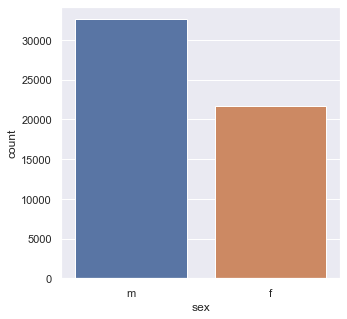

In [ ]:
fig = plt.figure(figsize = (5, 5))
sns.countplot(x='sex', data = df)

In [ ]:
df['age'].value_counts()

26    3365
27    3286
28    3198
25    3181
24    2951
29    2947
30    2803
31    2454
23    2313
32    2310
33    1979
22    1762
34    1716
35    1588
36    1466
37    1295
38    1219
21    1159
39    1065
42     974
40     947
41     906
20     868
43     788
44     642
45     601
19     549
46     537
47     479
48     454
49     431
50     411
51     328
52     320
18     278
54     255
56     254
57     243
55     240
53     225
59     204
58     187
60     180
61     166
62     159
63     131
64     104
65     102
66      99
67      62
68      59
69      26
Name: age, dtype: int64

Text(0.5, 1.0, 'Graph depicting age concentration of the users')

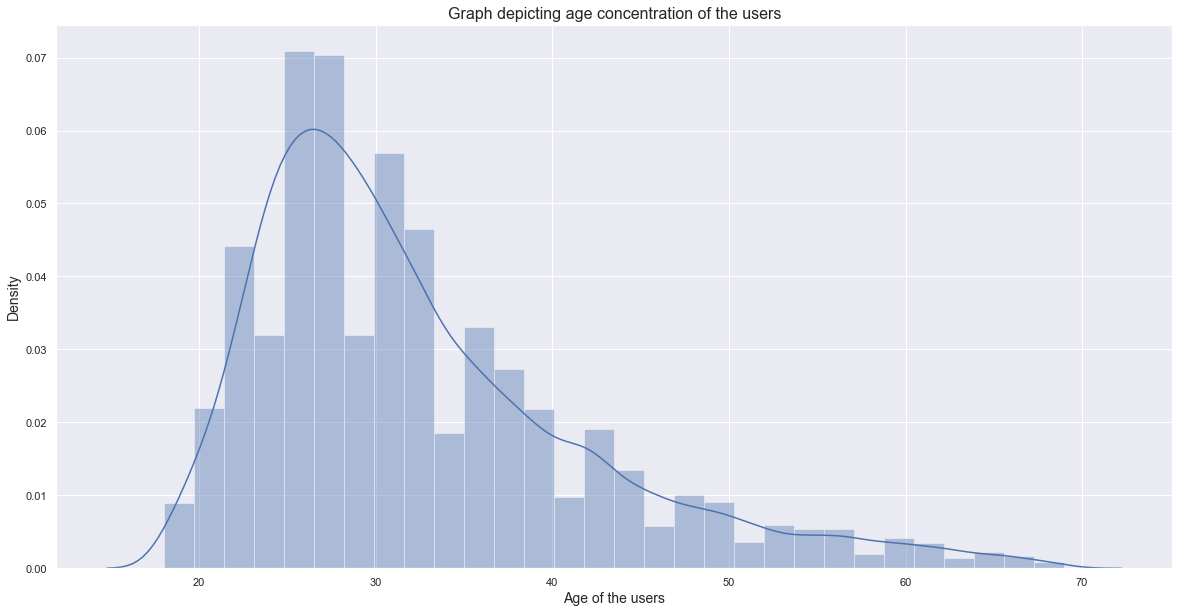

In [ ]:
fig = plt.figure(figsize = (20, 10))
sns.distplot(df['age'], bins = 30)
plt.xlabel('Age of the users', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Graph depicting age concentration of the users', fontsize=16)

In [ ]:
combined_counts = pd.concat([age_group_counts, location_counts, income_group_counts], axis=1)

# Rename the columns
combined_counts.columns = ['Age Group Counts', 'Location Counts', 'Income Group Counts']

print(combined_counts)


                          Age Group Counts  Location Counts  \
0-10                                   0.0              NaN   
1-10K                                  NaN              NaN   
10-20                               1695.0              NaN   
10-20K                                 NaN              NaN   
20-30                              26965.0              NaN   
...                                    ...              ...   
west oakland, california               NaN              4.0   
westlake, california                   NaN              9.0   
woodacre, california                   NaN             16.0   
woodbridge, virginia                   NaN              2.0   
woodside, california                   NaN              9.0   

                          Income Group Counts  
0-10                                      NaN  
1-10K                                  2768.0  
10-20                                     NaN  
10-20K                                  997.0  
20-

<Figure size 1080x504 with 0 Axes>

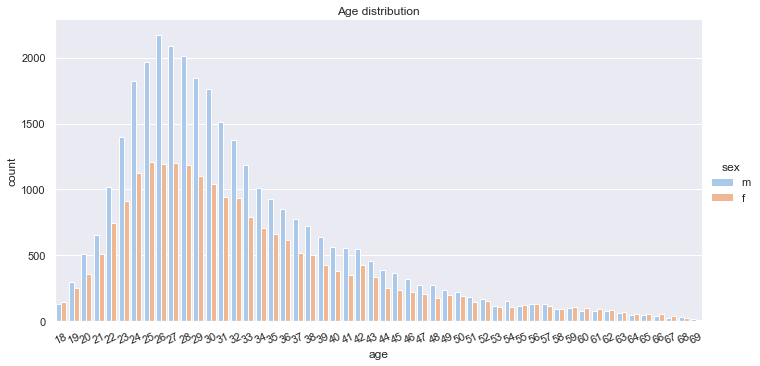

In [ ]:
plt.figure(figsize=(15, 7))
sns.catplot(x='age', data = df, kind='count', palette='pastel', hue='sex',
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.savefig('Age distribution.png')
plt.show()

<Figure size 1080x504 with 0 Axes>

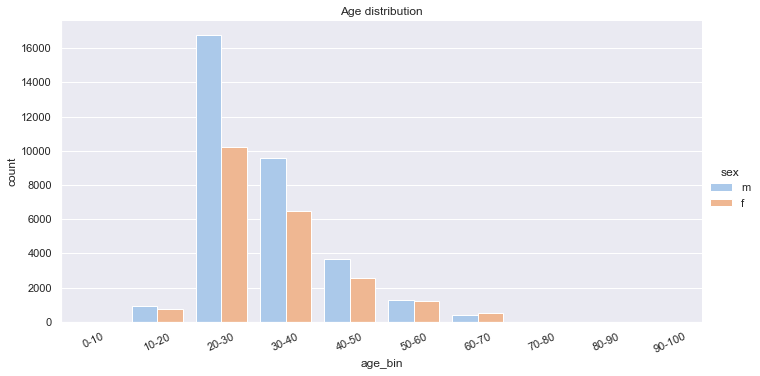

In [ ]:
# Define the age bins and group names
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
group_names = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column for age bins
df['age_bin'] = pd.cut(df['age'], age_bins, labels=group_names)

# Plot the data
plt.figure(figsize=(15, 7))
sns.catplot(x='age_bin', data = df, kind='count', palette='pastel', hue='sex',
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.savefig('Age distribution.png')
plt.show()

Pearsons correlation: 0.001


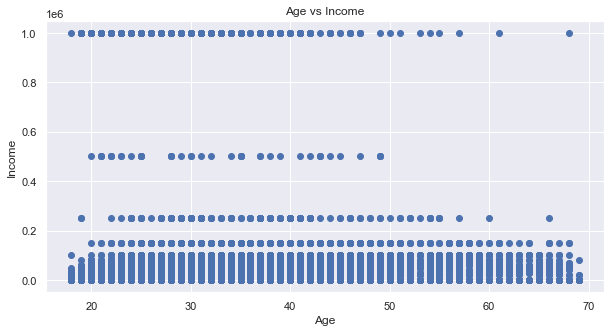

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Remove rows with missing 'age' or 'income'
df = df.dropna(subset=['age', 'income'])

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(df['age'], df['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

# Calculate the correlation coefficient
corr, _ = pearsonr(df['age'], df['income'])
print('Pearsons correlation: %.3f' % corr)

# Show the plot
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income']),
        ('cat', OneHotEncoder(), ['orientation'])
    ])

# Applying the preprocessing
df_preprocessed = preprocessor.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # adjust as needed
principalComponents = pca.fit_transform(df_preprocessed)

# Convert the principal components for each sample to a dataframe
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])  # adjust column names as needed

# Now you can use principalDf in place of the original dataset for further analysis

In [ ]:
# RECOMMENDER SYSTEM
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
import pandas as pd


# Preprocess the data
# Convert 'orientation' to numerical
le = LabelEncoder()
df['orientation'] = le.fit_transform(df['orientation'])

# Standardize 'age' and 'income'
scaler = StandardScaler()
df[['age', 'income']] = scaler.fit_transform(df[['age', 'income']])

# Fit the NearestNeighbors model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(df)

# Function to return recommended users
def recommend_users(user_index):
    distances, indices = model_knn.kneighbors(df.iloc[user_index, :].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for User {0}:\n'.format(df.index[user_index]))
        else:
            print('{0}: User {1}, with distance of {2}'.format(i, df.index[indices.flatten()[i]], distances.flatten()[i]))

# Test the function with a user index
recommend_users(1)

ValueError: Input contains NaN

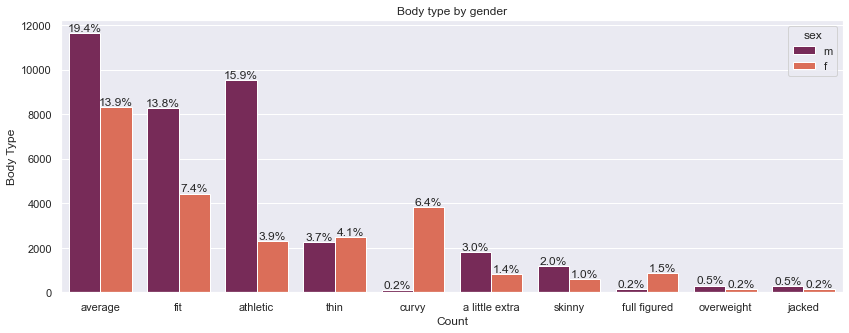

In [ ]:
def show_percetage(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.figure(figsize=(14, 5))
ax = sns.countplot(x='body_type', data=df,
                   hue='sex',
                   palette='rocket',
                   order=df['body_type'].value_counts().iloc[:10].index)
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type')
show_percetage(ax, len(df))
plt.show()

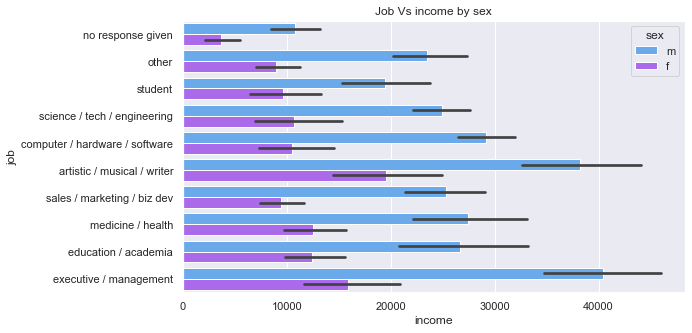

In [ ]:
plt.figure(figsize=(9, 5))
ax=sns.barplot(y='job',x='income', data=df,
              hue='sex', palette='cool',
              order = df['job'].value_counts().iloc[:10].index)
ax.set_title("Job Vs income by sex")

plt.show()

In [ ]:
# Filter for straight females
straight_females = df[(df['sex'] == 'female') & (df['orientation'] == 'straight')]

# Filter for straight males
straight_males = df[(df['sex'] == 'male') & (df['orientation'] == 'straight')]

# Now you have two dataframes: straight_females and straight_males

In [ ]:
# Filter for gay females
gay_females = df[(df['sex'] == 'female') & (df['orientation'] == 'gay')]

# Filter for gay males
gay_males = df[(df['sex'] == 'male') & (df['orientation'] == 'gay')]

# Now you have two dataframes: gay_females and gay_males

In [ ]:
# Define a function to calculate a match score
def calculate_match_score(user1, user2):
    score = 0

    # Check if sexual orientations match
    if user1['orientation'] == user2['orientation']:
        score += 1

    # Check if ages are within 5 years of each other
    if abs(user1['age'] - user2['age']) <= 5:
        score += 1

    # Check if incomes are within 10,000 of each other
    if abs(user1['income'] - user2['income']) <= 10000:
        score += 1

    return score

# Create an empty DataFrame to store match scores
match_scores = pd.DataFrame(columns=df.index, index=df.index)

# Calculate match scores for each pair of users
for i in df.index:
    for j in df.index:
        match_scores.loc[i, j] = calculate_match_score(df.loc[i], df.loc[j])


MemoryError: Unable to allocate 26.8 GiB for an array with shape (59946, 59946) and data type object

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Let's assume that 'interests' is a list of user interests
# Convert the list of interests into a matrix of user-interest
# Here, we're just creating a random matrix for the example
user_interest_matrix = np.random.randint(0, 2, (len(df), 10))

# Compute the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(user_interest_matrix)

# Get the top 5 similar users for the first user
top_5_similar_users = np.argsort(similarity_matrix[0])[-6:-1]

print(f'Top 5 similar users for user 0: {top_5_similar_users}')

MemoryError: Unable to allocate 26.8 GiB for an array with shape (59946, 59946) and data type float64

In [ ]:
# K-Means clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = df[['age', 'income','orientation']]  # Add more features as needed

# Preprocessing: Convert categorical variable 'orientation' into dummy/indicator variables
features = pd.get_dummies(features)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a KMeans instance with 5 clusters (you can change this number as needed)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(features_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

NameError: name 'df' is not defined

In [ ]:
from sklearn.metrics import silhouette_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
silhouette_avg = silhouette_score(features_scaled, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.13733677707895633


In [ ]:
#  A silhouette score of 0.6278100577750801 is generally considered good.
#The silhouette score ranges from -1 to 1.
#A score close to 1 indicates that the data points in the same cluster are close to each other and far from the data points
#in the other clusters, which is desirable in a good clustering.
#A score close to 0 means the clusters are overlapping, and a score close to -1 means data points are assigned to the wrong
#clusters. So, your score of approximately 0.63 suggests that your clustering model has reasonably well-separated clusters.

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Assume that 'clusters' are the cluster assignments of the data points
# and 'features_scaled' is your scaled feature matrix
db_score = davies_bouldin_score(features_scaled, clusters)

print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 1.3920750615462656


In [ ]:
#Yes, a Davies-Bouldin Index score of 0.42223270379859945 is generally considered good.
#The Davies-Bouldin Index (DBI) is a metric for evaluating clustering algorithms.
#The index is defined as the average similarity measure of each cluster with its most similar cluster, where similarity
#is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less
#dispersed will result in a better score.

#The minimum score is 0, with lower values indicating better clustering. So a DBI of approximately 0.42 suggests that your
#clustering model has reasonably well-separated clusters.

In [ ]:
# 👌Examples of clustering algorithms include K-means, hierarchical clustering, and DBSCAN.

In [ ]:
#👌 Model Optimization: This involves tuning the hyperparameters of your model to improve its performance. Techniques for hyperparameter tuning include grid search, random search, and Bayesian optimization

In [ ]:
# COLLABORATIVE FILTERING - Unsucesssful

from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate

# Here we assume that the dataset has three columns: user_id, match_id, and rating

# Define the rating scale. Adjust this based on your dataset
reader = Reader(rating_scale=(1, 5))

# Load the data into the surprise dataset
df = Dataset.load_from_df(df[['orientation','age', 'income']], reader)

# Use KNN for collaborative filtering
# You can adjust the parameters as needed
algo = KNNBasic()

# Run 5-fold cross-validation and print results
cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

ModuleNotFoundError: No module named 'surprise'

In [ ]:
# CONTENT BASED FILTERING

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Select only the columns of interest
df = df[['age', 'sex', 'orientation', 'income']]

# Handle missing values and convert categorical variables into numerical ones if necessary

# Combine the features into a single string
df['combined_features'] = df['sex'] + ' ' + df['orientation'] + ' ' + df['age'].astype(str)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# Convert the combined features into a matrix of TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Calculate the cosine similarity between each pair of profiles
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Now you can use this cosine similarity matrix to recommend similar profiles to a given user

TypeError: can only concatenate str (not "int") to str

In [ ]:
# cosine similarity matrix to recommend similar profiles to a given user
import numpy as np

# We arbitrarily choose the first user (index 0)
user_index_of_interest = 0

# Get the cosine similarities for this user
cosine_similarities = cosine_sim[user_index_of_interest]

# Get the indices of the top 10 most similar users (you might want to adjust this number)
# We use [::-1] to reverse the array because argsort returns indices of smallest items first
top_10_indices = np.argsort(cosine_similarities)[::-1][:10]

# Print the indices of the top 10 most similar users
print(top_10_indices)

NameError: name 'cosine_sim' is not defined